In [ ]:
import numpy as np 
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

In [ ]:
df_customers=pd.read_csv("/content/olist_customers_dataset.csv")
df_geolocation=pd.read_csv("/content/olist_geolocation_dataset.csv")
df_item = pd.read_csv("/content/olist_order_items_dataset.csv")
df_order_pay = pd.read_csv("/content/olist_order_payments_dataset.csv")
df_reviews=pd.read_csv("/content/olist_order_reviews_dataset.csv")
df_orders=pd.read_csv("/content/olist_orders_dataset.csv")
df_products=pd.read_csv("/content/olist_products_dataset.csv")
df_sellers=pd.read_csv("/content/olist_sellers_dataset.csv")
df_category=pd.read_csv("/content/product_category_name_translation.csv")

#### Merging Datasets

In [ ]:
df_full = df_orders.merge(df_item, on='order_id', how='left')
df_full = df_full.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_full = df_full.merge(df_reviews, on='order_id', how='outer')
df_full = df_full.merge(df_products, on='product_id', how='outer')
df_full = df_full.merge(df_customers, on='customer_id', how='outer')
df_full = df_full.merge(df_sellers, on='seller_id', how='outer')


print(df_full.shape)

(119151, 39)


In [ ]:
list(df_full.columns)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

#### Dropping unnecessary columns

In [ ]:
df_full.drop(["order_approved_at",
         "order_delivered_carrier_date",
         "order_delivered_customer_date",
         "order_estimated_delivery_date",
         "review_comment_title",
         "review_comment_message"],
       axis='columns', inplace=True)

### Getting information about the variables

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [ ]:
resumetable(df_full)

Dataset Shape: (119151, 33)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.46
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,16.44
4,order_item_id,float64,833,21,1,1,1,0.72
5,product_id,object,833,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.63
6,seller_id,object,833,3095,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,9.48
7,shipping_limit_date,object,833,93318,2017-10-06 11:07:15,2017-10-06 11:07:15,2017-10-06 11:07:15,16.34
8,price,float64,833,5968,29.99,29.99,29.99,9.58
9,freight_value,float64,833,6999,8.72,8.72,8.72,10.51


#### Changing data types

In [ ]:
id_cols = ['order_id', 'seller_id', 'customer_id', 'order_item_id', 'product_id', 
           'review_id', 'customer_unique_id', 'seller_zip_code_prefix']
#categorical columns
cat_cols = df_full.nunique()[df_full.nunique() <= 27].keys().tolist()
# cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df_full.columns if x not in cat_cols + id_cols]

#Binary columns with 2 values
bin_cols = df_full.nunique()[df_full.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

## Visualization

#### Let's take a look at the different categories of objects and their frequency of purchase

In [ ]:
df_cat = pd.merge(df_products, df_category, on='product_category_name', how='left')

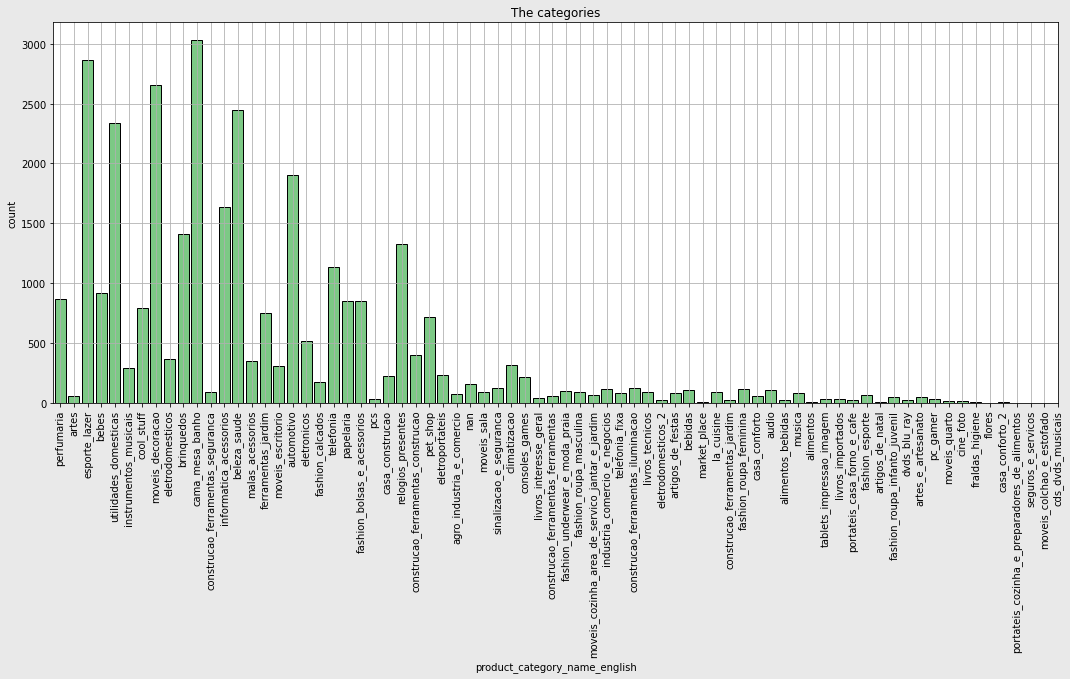

In [ ]:
(fig, ax) = plt.subplots(figsize=(18, 7))
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("The categories")
sns.countplot(data=df_cat,x="product_category_name_english",edgecolor='black',color="#6fd67b")
plt.xticks(range(0,df_cat["product_category_name"].nunique()+1)
           ,df_cat["product_category_name"].unique(),rotation=90)
plt.grid()

In [ ]:
df_full['price_log'] = np.log(df_full['price'] + 1.5)

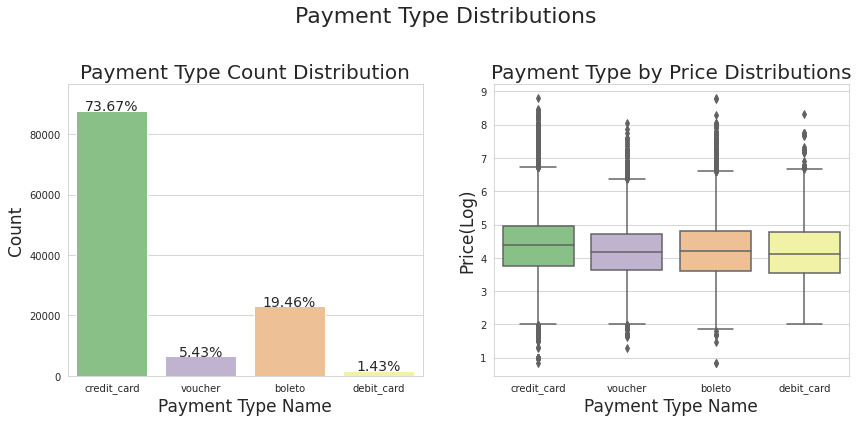

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Accent')

total = len(df_full)

plt.figure(figsize=(14,6))

plt.suptitle('Payment Type Distributions', fontsize=22)

plt.subplot(121)
g = sns.countplot(x='payment_type', data=df_full[df_full['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(122)
g = sns.boxplot(x='payment_type', y='price_log', data=df_full[df_full['payment_type'] != 'not_defined'])
g.set_title("Payment Type by Price Distributions", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Price(Log)", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()

#### Let's explore the Customers and Sellers states

## Customers

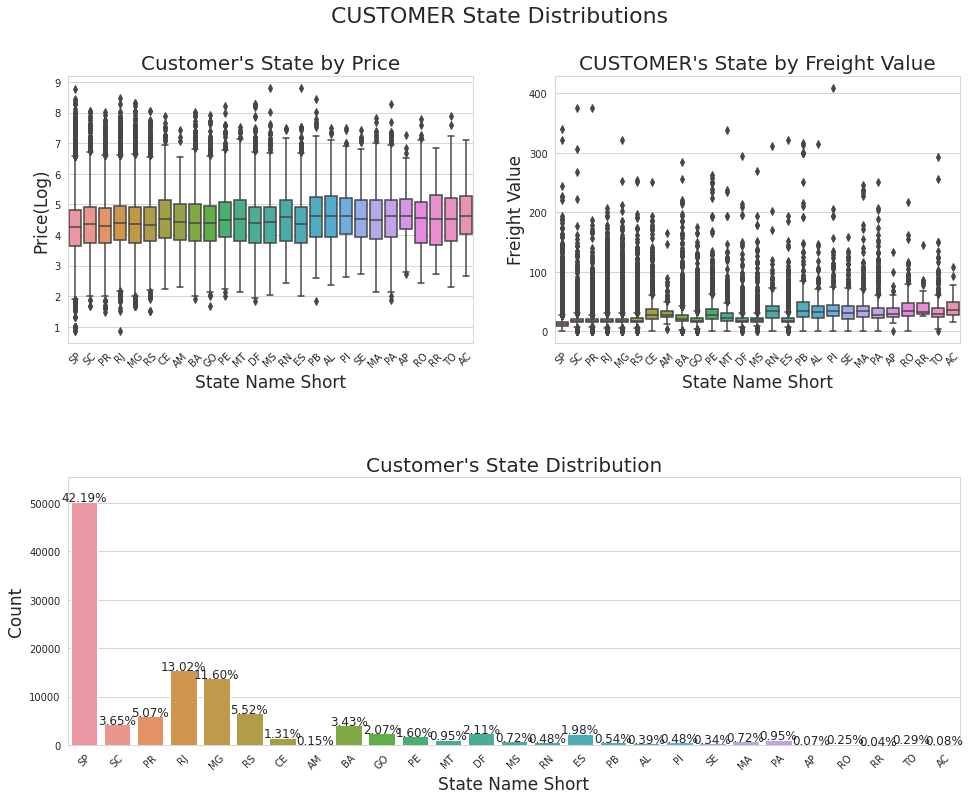

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Accent')

plt.figure(figsize=(16,12))

plt.suptitle('CUSTOMER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='customer_state', data=df_full, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='customer_state', y='price_log', 
                 data=df_full[df_full['price'] != -1])
g2.set_title("Customer's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=df_full[df_full['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()


## Sellers

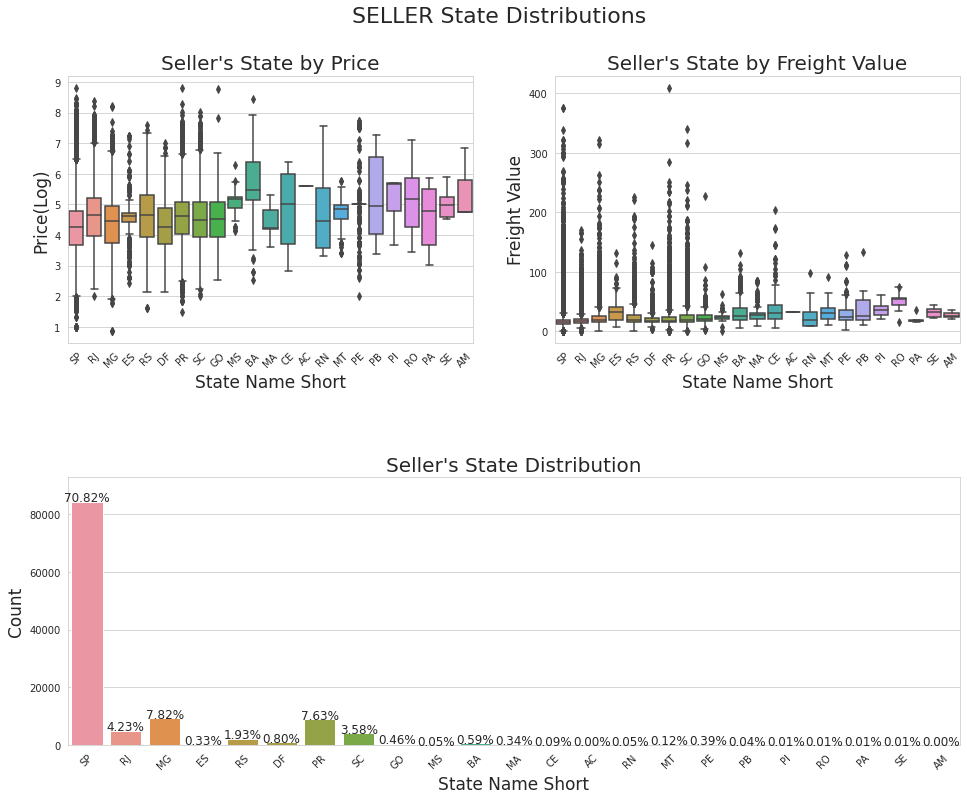

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Accent')

plt.figure(figsize=(16,12))

plt.suptitle('SELLER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=df_full, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=df_full[df_full['price'] != -1])
g2.set_title("Seller's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='seller_state', y='freight_value', 
                 data=df_full[df_full['price'] != -1])
g3.set_title("Seller's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

# Cohort Analysis

In [ ]:
df_2=df_customers.merge(df_orders, on='customer_id', how='inner')

In [ ]:
df_2.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
df_2['order_purchase_timestamp'] = pd.to_datetime(df_2['order_purchase_timestamp'])
#df_2['order_purchase_timestamp']=df_2['order_purchase_timestamp'].dt.strftime('%d-%m-%Y')

In [ ]:
def get_month(x):return dt.datetime(x.year, x.month, 1)
df_2['order_purchase_month'] = df_2['order_purchase_timestamp'].apply(get_month)
grouping = df_2.groupby('customer_unique_id')['order_purchase_month']
df_2['CohortMonth'] = grouping.transform('min')
#df_2['CohortMonth'] =df_2['CohortMonth'].dt.strftime('%d-%m-%Y')
df_2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,CohortMonth
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-01,2017-05-01
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-01,2018-01-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-01,2018-05-01
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-01,2018-03-01
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-01,2018-07-01


In [ ]:
def get_date_int(df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year, month, day

In [ ]:
order_year, order_month, _ = get_date_int(df_2, 'order_purchase_month')
cohort_year, cohort_month, _ = get_date_int(df_2, 'CohortMonth')
years_diff = order_year - cohort_year
months_diff = order_month - cohort_month
df_2['CohortIndex'] = years_diff * 12 + months_diff + 1
df_2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,CohortMonth,CohortIndex
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-01,2017-05-01,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-01,2018-01-01,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-01,2018-05-01,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-01,2018-03-01,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-01,2018-07-01,1


In [ ]:
df_2.dropna(inplace=True)
df_2.isnull().values.any()

False

In [ ]:
grouping = df_2.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['customer_unique_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='customer_unique_id')
print(cohort_counts)

CohortIndex      1     2     3     4     5     6   ...   15   16   17   18   20   21
CohortMonth                                        ...                              
2016-09-01      1.0   NaN   NaN   NaN   NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2016-10-01    267.0   NaN   NaN   NaN   NaN   NaN  ...  NaN  1.0  NaN  1.0  2.0  2.0
2016-12-01      1.0   1.0   NaN   NaN   NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2017-01-01    715.0   3.0   2.0   1.0   3.0   1.0  ...  1.0  1.0  2.0  3.0  1.0  NaN
2017-02-01   1615.0   4.0   5.0   2.0   7.0   2.0  ...  2.0  1.0  1.0  4.0  NaN  NaN
2017-03-01   2502.0  13.0   9.0  10.0   9.0   4.0  ...  4.0  6.0  2.0  4.0  NaN  NaN
2017-04-01   2254.0  14.0   5.0   4.0   7.0   6.0  ...  2.0  2.0  5.0  NaN  NaN  NaN
2017-05-01   3450.0  18.0  18.0  13.0  11.0  12.0  ...  7.0  9.0  NaN  NaN  NaN  NaN
2017-06-01   3035.0  15.0  11.0  12.0   8.0  11.0  ...  6.0  NaN  NaN  NaN  NaN  NaN
2017-07-01   3750.0  20.0  14.0  10.0  11.0   8.0  ...  NaN  NaN 

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]

In [ ]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
CohortMonth,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,NaN,0.003745,NaN,NaN,0.003745,NaN,0.003745,NaN,0.003745,NaN,0.003745,NaN,0.003745,0.007491,0.007491
2016-12-01,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.004196,0.002797,0.001399,0.004196,0.001399,0.004196,0.001399,0.001399,NaN,0.004196,0.001399,0.006993,0.004196,0.001399,0.001399,0.002797,0.004196,0.001399,NaN
2017-02-01,1.0,0.002477,0.003096,0.001238,0.004334,0.001238,0.002477,0.001858,0.001858,0.002477,0.001238,0.003096,0.001858,0.001858,0.001238,0.000619,0.000619,0.002477,NaN,NaN
2017-03-01,1.0,0.005196,0.003597,0.003997,0.003597,0.001599,0.001599,0.003197,0.003597,0.000799,0.003597,0.001199,0.002398,0.001199,0.001599,0.002398,0.000799,0.001599,NaN,NaN
2017-04-01,1.0,0.006211,0.002218,0.001775,0.003106,0.002662,0.003549,0.003106,0.003106,0.001775,0.002662,0.000887,0.000887,0.000444,0.000887,0.000887,0.002218,NaN,NaN,NaN
2017-05-01,1.0,0.005217,0.005217,0.003768,0.003188,0.003478,0.004348,0.001739,0.002609,0.002609,0.002609,0.003478,0.002609,0.000290,0.002029,0.002609,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004942,0.003624,0.003954,0.002636,0.003624,0.003954,0.002306,0.001318,0.002306,0.003295,0.003295,0.001647,0.001318,0.001977,NaN,NaN,NaN,NaN,NaN


In [ ]:
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
CohortMonth,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,100.0,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,0.4,NaN,0.4,NaN,0.4,NaN,0.4,NaN,0.4,0.7,0.7
2016-12-01,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,0.4,0.3,0.1,0.4,0.1,0.4,0.1,0.1,NaN,0.4,0.1,0.7,0.4,0.1,0.1,0.3,0.4,0.1,NaN
2017-02-01,100.0,0.2,0.3,0.1,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.3,0.2,0.2,0.1,0.1,0.1,0.2,NaN,NaN
2017-03-01,100.0,0.5,0.4,0.4,0.4,0.2,0.2,0.3,0.4,0.1,0.4,0.1,0.2,0.1,0.2,0.2,0.1,0.2,NaN,NaN
2017-04-01,100.0,0.6,0.2,0.2,0.3,0.3,0.4,0.3,0.3,0.2,0.3,0.1,0.1,0.0,0.1,0.1,0.2,NaN,NaN,NaN
2017-05-01,100.0,0.5,0.5,0.4,0.3,0.3,0.4,0.2,0.3,0.3,0.3,0.3,0.3,0.0,0.2,0.3,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.5,0.4,0.4,0.3,0.4,0.4,0.2,0.1,0.2,0.3,0.3,0.2,0.1,0.2,NaN,NaN,NaN,NaN,NaN


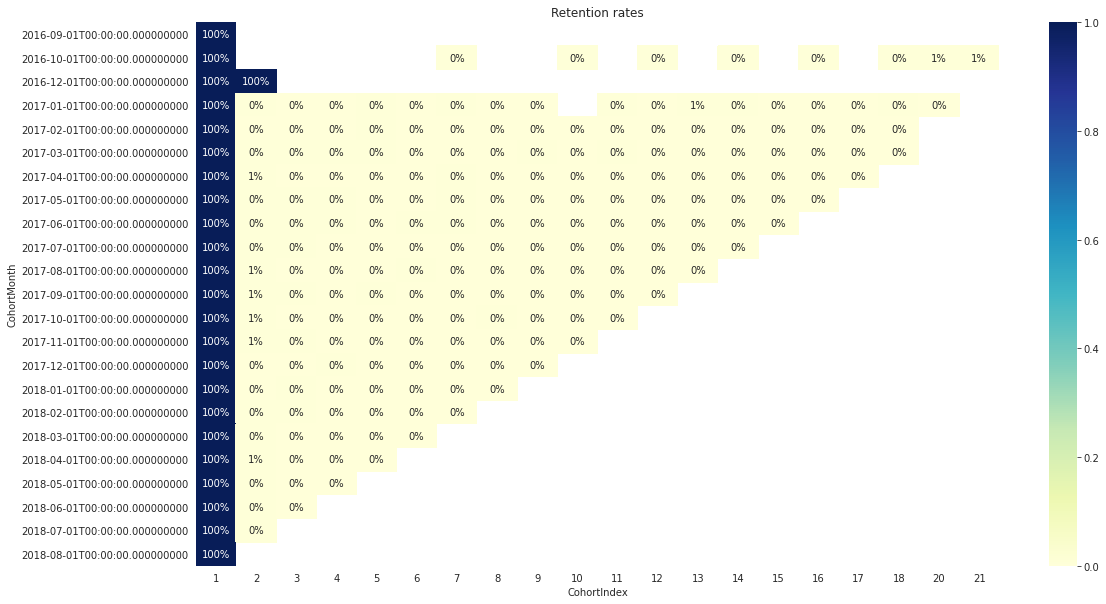

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.title('Retention rates')
sns.heatmap(data = retention.round(3),
            annot = True,
            fmt='.0%',
            #fmt = '.0%',
            #vmin = 0.0,
            #vmax = 0.5,
            cmap = 'YlGnBu')
plt.show()



In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(retention.round(3) * 100, annot=True, cmap='RdYlGn' , fmt='.0%' )
plt.title('Monthly cohort of customers retention')
plt.xlabel("Period Number'")
var = plt.ylabel("Month of Purchase")

# RFM Analysis

In [ ]:
joined = df_orders.merge(df_order_pay, on='order_id', how='outer')
joined_df=joined.merge(df_customers,on='customer_id',how='outer')

In [ ]:
joined_df = joined_df.loc[joined_df['order_delivered_carrier_date'] >= '2017-0-01']
joined_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [ ]:
print('Min:{}; Max:{}'.format(min(joined_df.order_delivered_carrier_date),
                              max(joined_df.order_delivered_carrier_date)))

Min:2017-01-06 12:43:41; Max:2018-09-11 19:48:28


 ## RFM Counts

In [ ]:
joined_df['order_delivered_carrier_date'] = pd.to_datetime(joined_df['order_delivered_carrier_date']) # datetime conversion
last_date = joined_df['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

RFM = joined_df.dropna(subset=['order_delivered_carrier_date'])\
            .reset_index()\
            .groupby('customer_unique_id')\
            .agg(Recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 Frequency = ('order_id', 'size'),
                 Monetary = ('payment_value', 'sum'))

In [ ]:
RFM

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,123,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,126,1,27.19
0000f46a3911fa3c0805444483337064,548,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,333,1,43.62
0004aac84e0df4da2b147fca70cf8255,299,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,265,1,84.58
ffff371b4d645b6ecea244b27531430a,581,1,112.46


In [ ]:
RFM.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,123,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,126,1,27.19
0000f46a3911fa3c0805444483337064,548,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,333,1,43.62
0004aac84e0df4da2b147fca70cf8255,299,1,196.89


## Recency

### Let’s look at customer distribution based on recency.

<Figure size 1152x720 with 0 Axes>

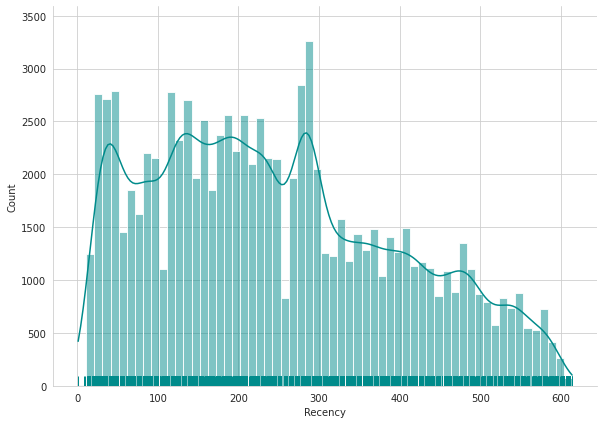

In [ ]:
plt.figure(figsize=(16,10))
#sns.set_palette("BuGn_r")
sns.displot(RFM.Recency,kde=True,rug=True,color="darkcyan",height=6, aspect=11.7/8.27)

## Frequency

In [ ]:
RFM['Frequency'].value_counts(normalize=True)*100

1     94.127264
2      4.927918
3      0.558398
4      0.170917
5      0.074312
6      0.052018
7      0.030786
8      0.012739
9      0.009554
11     0.007431
12     0.005308
10     0.004246
13     0.004246
14     0.003185
15     0.002123
16     0.002123
19     0.002123
29     0.001062
22     0.001062
23     0.001062
26     0.001062
33     0.001062
Name: Frequency, dtype: float64

The number of customers who ordered more than 5 times is very small, so they can be considered as outliers.

In [ ]:
RFM = RFM[RFM['Frequency'] <= 5]

## Monetary

In [ ]:
RFM['Monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    94065.000000
mean       165.045064
std        225.997342
min          9.590000
25%         63.070000
50%        107.780000
75%        182.440000
90%        317.786000
95%        468.678000
99%       1094.830800
max      13664.080000
Name: Monetary, dtype: float64

Here I chose 95% to drop outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


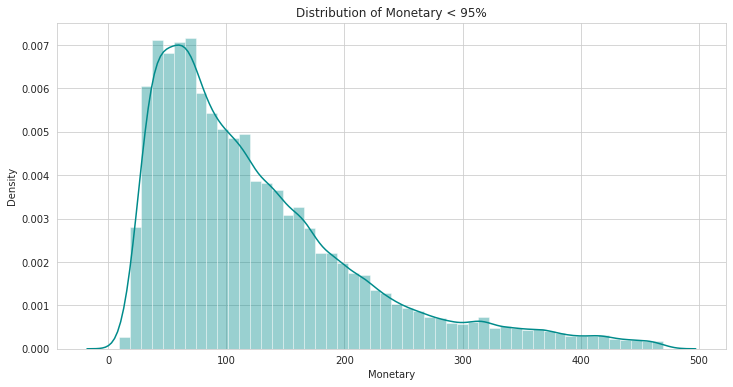

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(RFM[RFM['Monetary']<470].Monetary,color="darkcyan");

## Recency, Frequency, Monetary Scores

In [ ]:
r_labels = range(3, 0, -1)
m_labels = range(1,4)

m_quartiles = pd.qcut(RFM['Monetary'], 3, labels = m_labels)
r_quartiles = pd.qcut(RFM['Recency'], 3, labels = r_labels)

RFM = RFM.assign(R_Score = r_quartiles.values)
RFM = RFM.assign(M_score = m_quartiles.values)

RFM['F_score'] = RFM['Frequency'].apply(lambda x: 1 if x==1 else (2 if 2<x<4 else 3))

RFM.reset_index()
RFM.head()

,Recency,Frequency,Monetary,R_Score,M_score,F_score,RFM_Segment,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,123,1,141.90,3,2,1,3.01.02.0,6
0000b849f77a49e4a4ce2b2a4ca5be3f,126,1,27.19,3,1,1,3.01.01.0,5
0000f46a3911fa3c0805444483337064,548,1,86.22,1,2,1,1.01.02.0,4
0000f6ccb0745a6a4b88665a16c9f078,333,1,43.62,1,1,1,1.01.01.0,3
0004aac84e0df4da2b147fca70cf8255,299,1,196.89,2,3,1,2.01.03.0,6


In [ ]:
RFM['R_Score']=RFM['R_Score'].astype('int')
RFM['M_score']=RFM['M_score'].astype('int')

## RFM segment and RFM score

In [ ]:
def join_rfm(x): return str(x['R_Score']) + str(x['F_score']) + str(x['M_score'])

RFM['RFM_Segment'] = RFM.apply(join_rfm, axis=1)
RFM['RFM_Score'] = RFM[['R_Score','F_score','M_score']].sum(axis=1)

RFM.reset_index()
RFM.head()

,Recency,Frequency,Monetary,R_Score,M_score,F_score,RFM_Segment,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,123,1,141.90,3,2,1,312,6
0000b849f77a49e4a4ce2b2a4ca5be3f,126,1,27.19,3,1,1,311,5
0000f46a3911fa3c0805444483337064,548,1,86.22,1,2,1,112,4
0000f6ccb0745a6a4b88665a16c9f078,333,1,43.62,1,1,1,111,3
0004aac84e0df4da2b147fca70cf8255,299,1,196.89,2,3,1,213,6


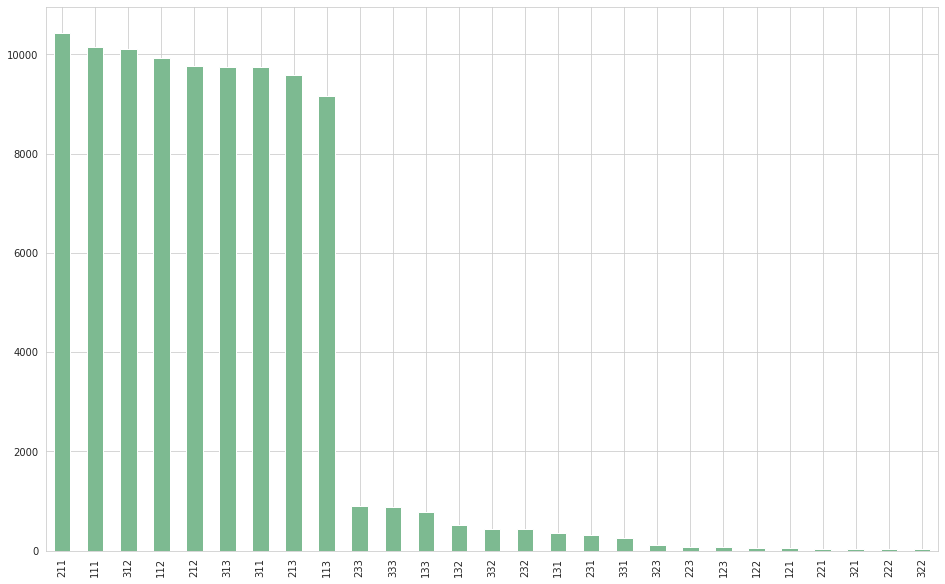

In [74]:
sns.set_palette('crest')
plt.figure(figsize=(16,10))
RFM['RFM_Segment'].value_counts().plot(kind="bar")

In [ ]:
pip install squarify

In [ ]:
import squarify

CORE - '123' - most recent, frequent, revenue generating - core customers that should be considered as most valuable clients

GONE - '311', '312', '313' - gone, one-timers - those clients are probably gone;

NEWCOMER - '111', '112', '113' - just have joined - new clients that have joined recently

PROFITABLE - '323', '213', '223 - most revenue generating - whales that generate revenue

LOYAL - '221', '222', '321', '322' - loyal users

REGULAR - '121', '122', '211', '212', - average users - just regular customers that don't stand out

In [75]:
def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Newcomer'
    elif x in ['323', '213', '223']:
        return 'Profitable'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'

In [76]:
RFM['segments'] = RFM['RFM_Segment'].apply(segment)
RFM['segments'].value_counts(normalize=True)*100

Gone          31.477170
Newcomer      31.104024
Regular       26.764471
Profitable    10.416202
Loyal          0.154149
Core           0.083984
Name: segments, dtype: float64

In [77]:
segmentwise = RFM.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Core,406.392405,3.000000,401.011392,79
Gone,86.573170,1.000000,165.104677,29609
Loyal,155.124138,3.000000,79.842690,145
Newcomer,426.635040,1.000000,162.197724,29258
Profitable,226.895795,1.041641,315.945348,9798
Regular,234.718263,1.222474,109.306839,25176


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


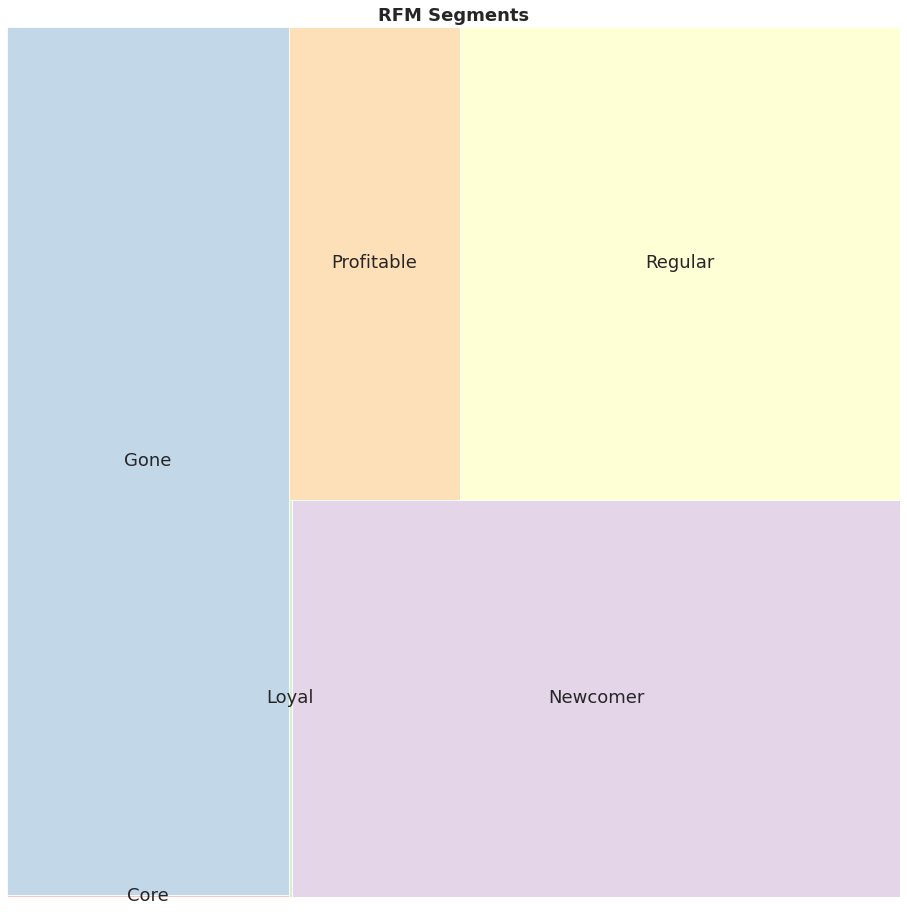

In [78]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color =plt.cm.Pastel1.colors,
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()
